In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from datasist.structdata import detect_outliers



## other
#from imblearn.over_sampling import SMOTE

## sklearn -- preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

## sklearn -- models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

## skelarn -- metrics
from sklearn.metrics import f1_score, accuracy_score

### `Data URL`
- https://www.kaggle.com/code/touba7/insurance-prediction-with-five-regressor-models/data

### `Read Dataset`

In [3]:
df = pd.read_csv("insurance.csv", na_values=['Unknown', '', 'na', 'nan', 'NA', 'NAN' ])
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [4]:
df.shape

(1338, 7)

In [5]:
# trim and replace space inside columns names with _
df.columns = df.columns.str.lower().str.strip().str.strip().str.replace(' ', '_')
df.rename(columns={'sex':'gender'}, inplace=True)
df.head(3)

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


### `Check the datatypes of the columns`

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.describe(include=['O'])

,gender,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


### `Check number of NA cells in each column`

In [9]:
# print the percentage of null cells in each column ordered desc 
df.isna().sum().sort_values(ascending=False) / df.shape[0]

age         0.0
gender      0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

### `Feature Engineering`

#### `Create age_group contains the values (Infants, Children, Adolescents, Adults, Older)`

In [21]:
bins= [0,20,40,60,80]
labels = ['less_than_20','less_than_40','less_than_60','less_than_80']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False).astype(object)
df.loc[:,['age', 'age_group']]


,age,age_group
0,19,less_than_20
1,18,less_than_20
2,28,less_than_40
3,33,less_than_40
4,32,less_than_40
...,...,...
1333,50,less_than_60
1334,18,less_than_20
1335,18,less_than_20
1336,21,less_than_40


### `Visualization`

 
boxplot of charges


##### `Draw histogram of Body mass index "bmi"  given gender`

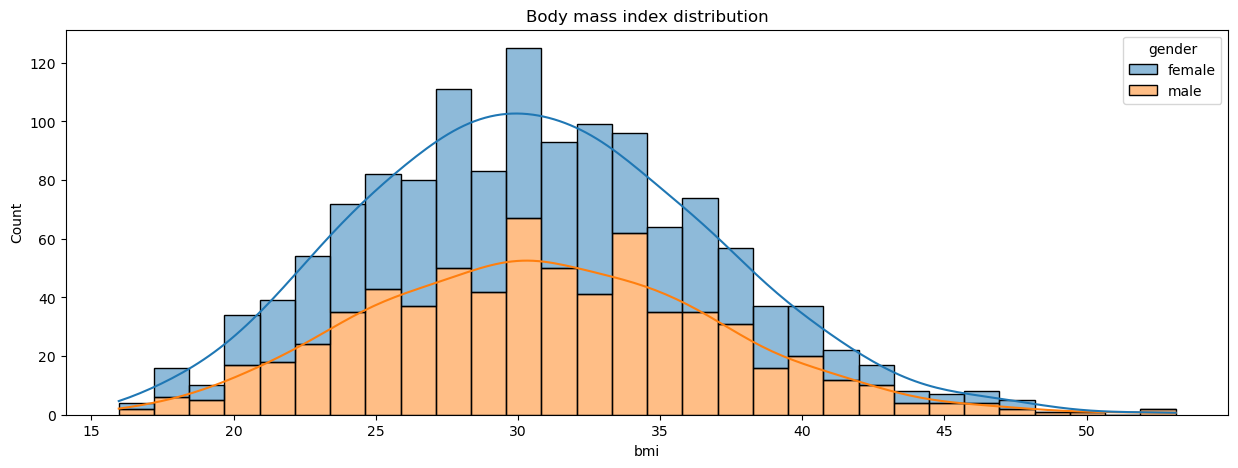

In [24]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x='bmi', hue='gender', bins=30, multiple='stack', kde=True)
plt.title('Body mass index distribution')
plt.show()

##### `Draw number of smokers/non-smokers divided by age_group`

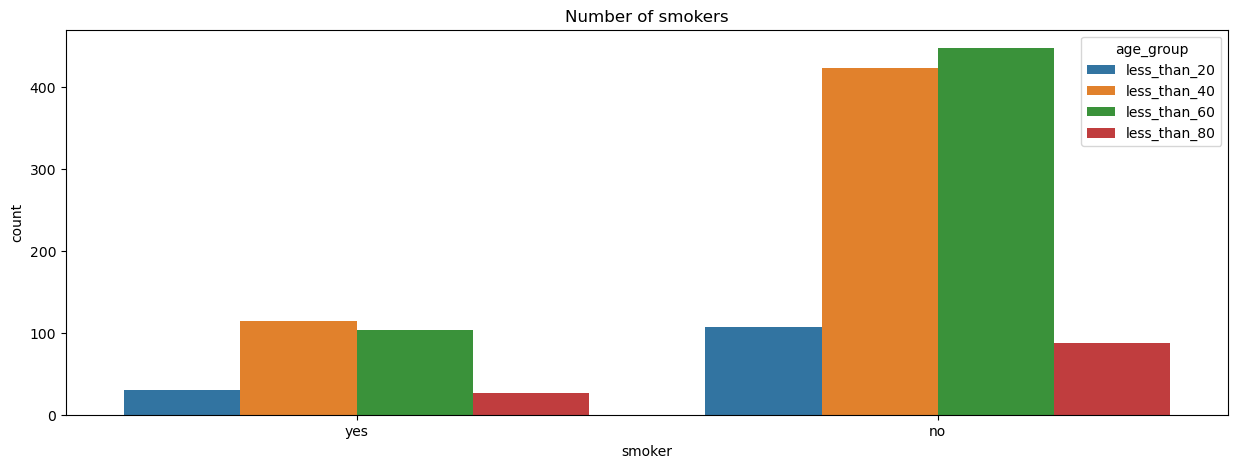

In [26]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='smoker', hue='age_group')
plt.title('Number of smokers')
plt.show()

##### `Draw number of clients in each region divided by age_group`

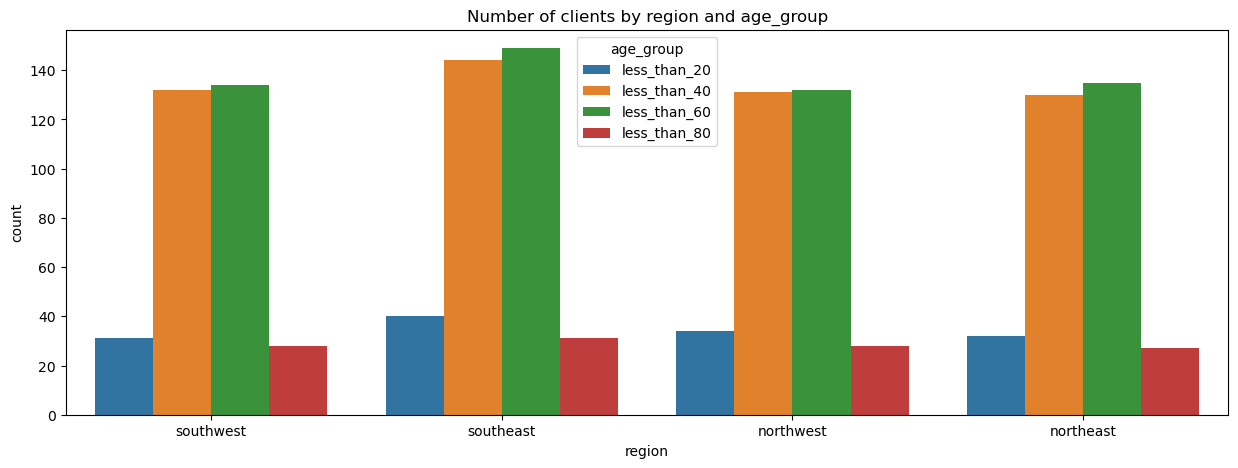

In [34]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='region', hue='age_group')
plt.title('Number of clients by region and age_group')
plt.show()

### `boxplot of Body Mass Index bmi based on gender and age-group`

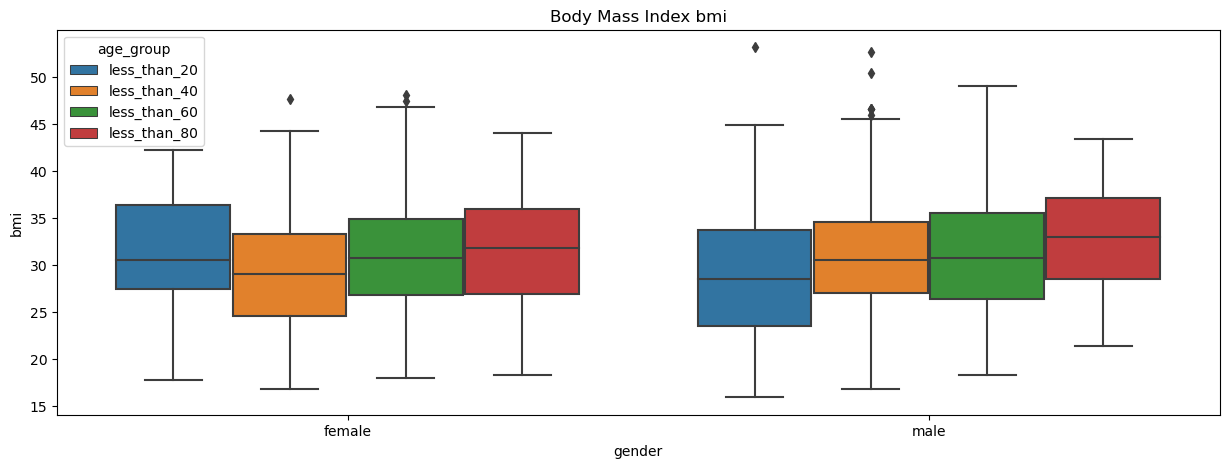

In [44]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, y='bmi', x='gender', hue='age_group')
plt.title('Body Mass Index bmi')
plt.show()

### `Scatterplot of charges based age, smoker/non-smoker and bmi`

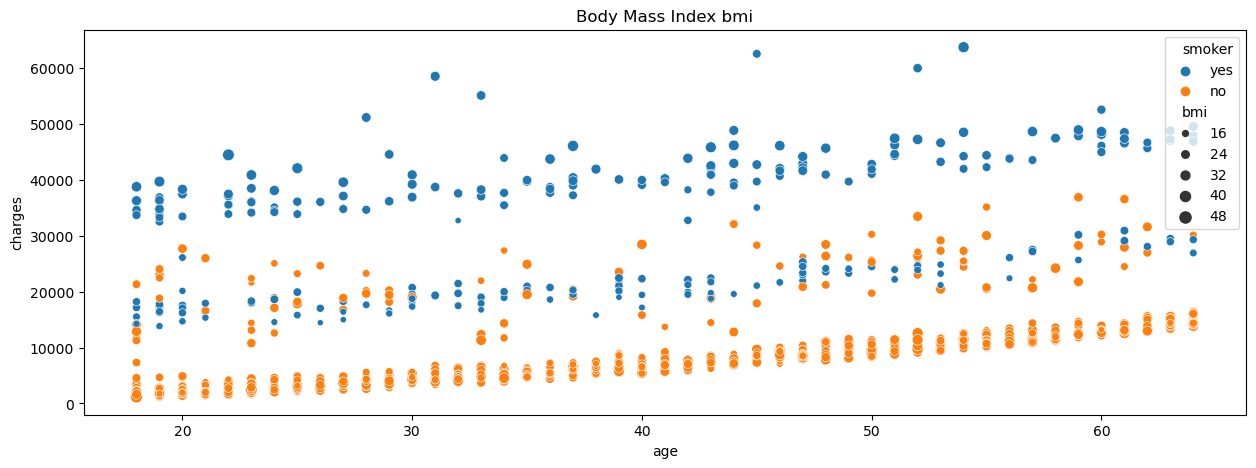

In [55]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df, y='charges', x='age', hue='smoker', size='bmi' )
plt.title('Body Mass Index bmi')
plt.show()

Conclusion:
- Charges increases for smokers

### `Detect Outliers and replace them with the median`

In [ ]:
df.hist(bins=40, figsize=(15,15))
plt.show()

column  flight_distance
median  843.0
outliers_indices count  2291
--------------------
column  departure_delay_in_minutes
median  0.0
outliers_indices count  14529
--------------------
column  arrival_delay_in_minutes
median  0.0
outliers_indices count  0
--------------------


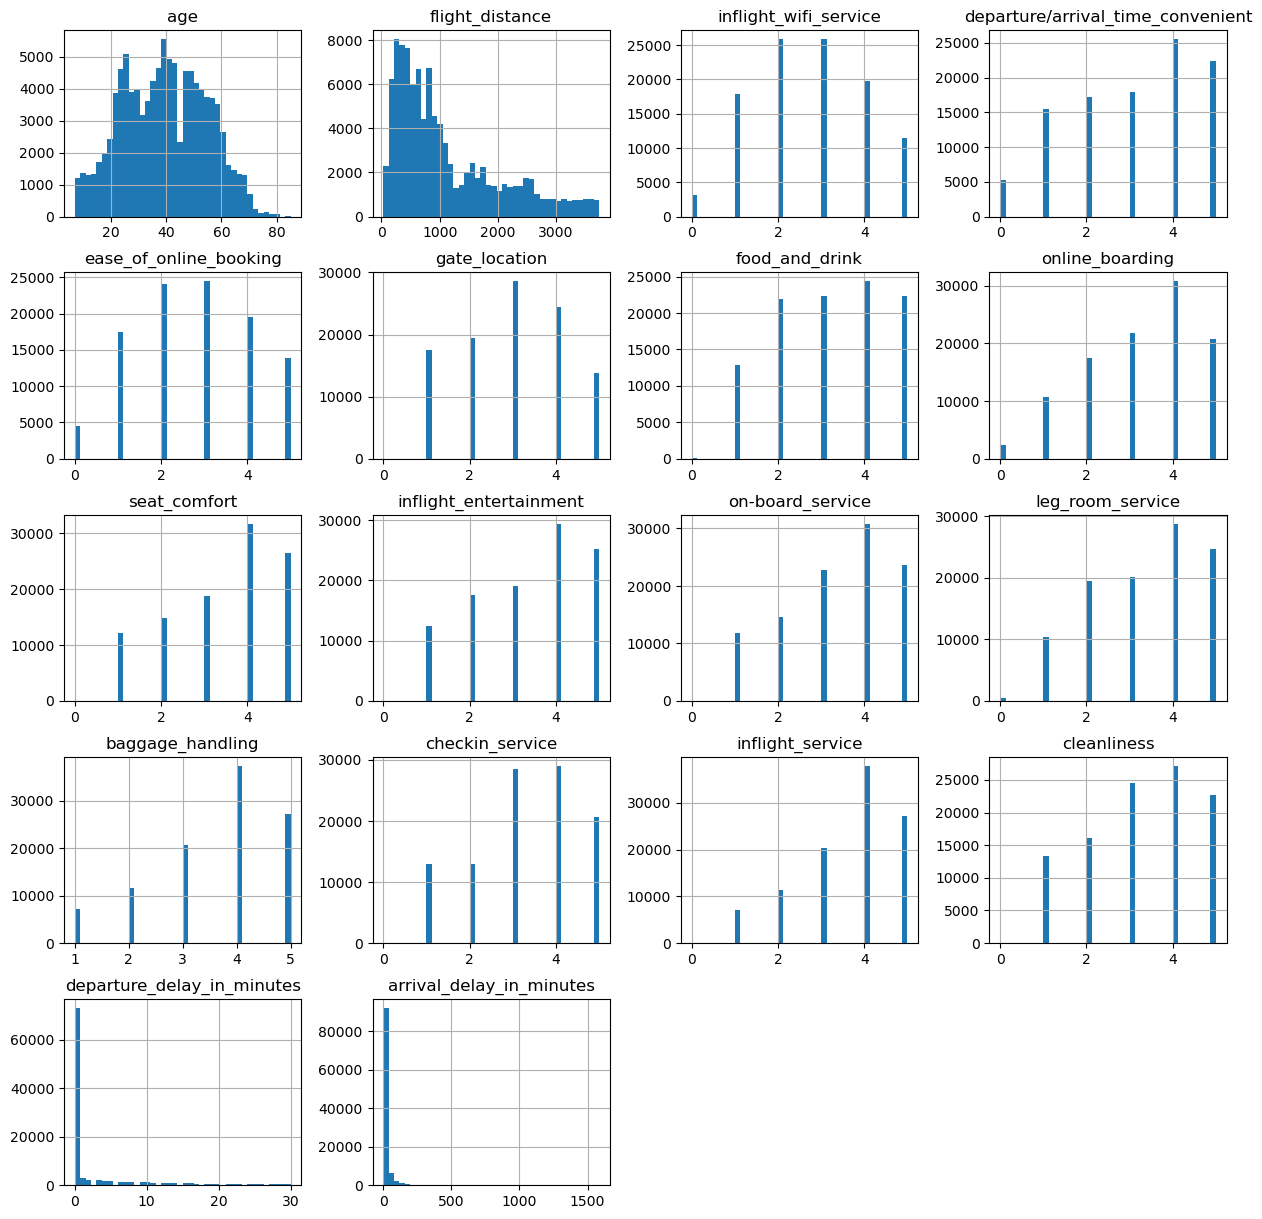

In [198]:
cols = np.array(['flight_distance', 'departure_delay_in_minutes', 'arrival_delay_in_minutes'])

for col in cols: 
    outliers_indices = detect_outliers(df, 0, [col])
    
    col_median = df[col].median()
    print('column ', col)
    print('median ', col_median) 
    print('outliers_indices count ',len( outliers_indices))
    print('----'*5)
    df.loc[outliers_indices, col] = col_median

df.hist(bins=40, figsize=(15,15))
plt.show()

### `Diagram to show boxplot of the flight_distance and divided by gender`

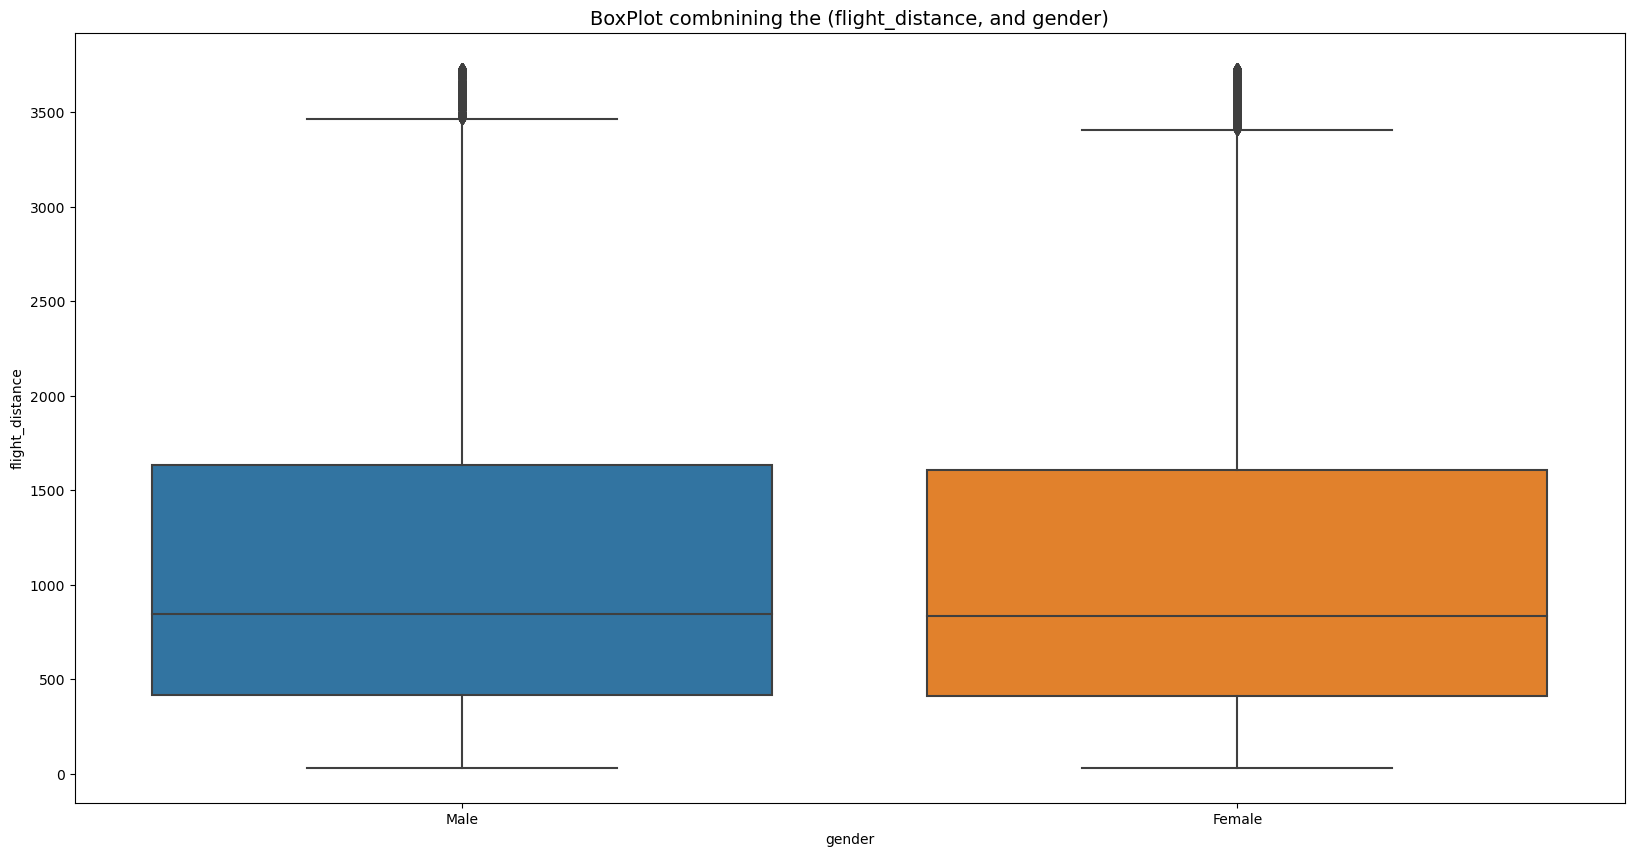

In [199]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, y='flight_distance', x='gender' )
plt.title('BoxPlot combnining the (flight_distance, and gender)', fontsize=14, color='k')
plt.show()

### `Split Data into train and validation datasets`

In [200]:
## Features and target
X = df.drop(columns=['satisfaction'], axis=1)
y = df['satisfaction']

## to full train and test
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=45, stratify=y)

print('X_train shape', X_train.shape)
print('X_valid shape', X_valid.shape)
print('y_train shape', y_train.shape)
print('y_valid shape', y_valid.shape)

X_train shape (83123, 23)
X_valid shape (20781, 23)
y_train shape (83123,)
y_valid shape (20781,)


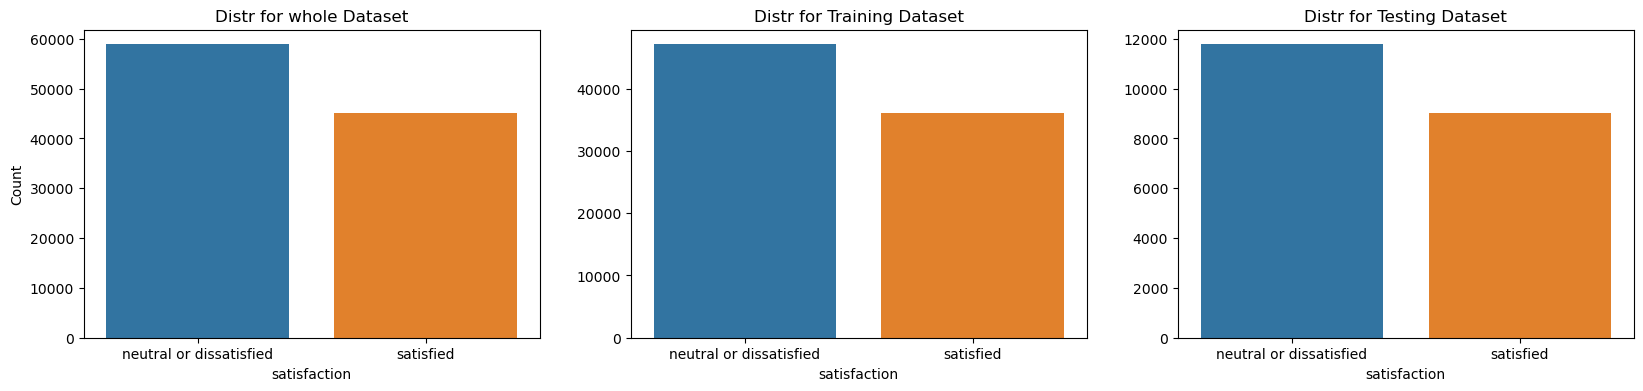

In [201]:
## Check the distr of target in train and test
fig, ax = plt.subplots(1, 3, figsize=(20, 4))

## for full data
plt.sca(ax[0])
sns.countplot(x=y, order=y.value_counts().index.tolist())
plt.title('Distr for whole Dataset')
plt.ylabel('Count')

## for Training data
plt.sca(ax[1])
sns.countplot(x=y_train, order=y.value_counts().index.tolist())
plt.title('Distr for Training Dataset')
plt.ylabel('')


## for Testing  data
plt.sca(ax[2])
sns.countplot(x=y_valid, order=y.value_counts().index.tolist())
plt.title('Distr for Testing Dataset')
plt.ylabel('')
plt.show()

#### `Data Preprocessing`

In [202]:
## Slice cols
num_cols = ['age', 'flight_distance', 'departure_delay_in_minutes', 'arrival_delay_in_minutes']
categ_cols = X_train.select_dtypes(include=['object','category']).columns.tolist()
print(categ_cols)
ready_cols = list(set(X_train.columns.tolist()) - set(num_cols) - set(categ_cols))
print(ready_cols)

['gender', 'customer_type', 'type_of_travel', 'class', 'age_group']
['online_boarding', 'on-board_service', 'departure/arrival_time_convenient', 'inflight_service', 'cleanliness', 'inflight_entertainment', 'leg_room_service', 'ease_of_online_booking', 'gate_location', 'seat_comfort', 'inflight_wifi_service', 'baggage_handling', 'checkin_service', 'food_and_drink']


In [203]:
## Pipeline 

## Numerical --> Impute using median, Standardization
## Cateforical --> Impute using mode, OHE
## Redy cols ---> Imputing

## Target ---> Label Encoding

In [204]:
## Numerical
num_pipline = Pipeline(steps=[
                ('selector', DataFrameSelector(num_cols)),
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())
            ])

## Categorical
categ_pipline = Pipeline(steps=[
                 ('selector', DataFrameSelector(categ_cols)),
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(drop='first', sparse_output=False))
])

## Ready cols -- Discret cols
ready_pipeline = Pipeline(steps=[
                ('selector', DataFrameSelector(ready_cols)),
                ('imputer', SimpleImputer(strategy='most_frequent'))
])


## Combine all
all_pipeline = FeatureUnion(transformer_list=[
                        ('num', num_pipline),
                        ('categ', categ_pipline),
                        ('ready', ready_pipeline)
                    ])

## apply
X_train_final  = all_pipeline.fit_transform(X_train)
X_valid_final = all_pipeline.transform(X_valid)


target__encoder = LabelEncoder()
y_train_encoded =  target__encoder.fit_transform(y_train)
y_valid_encoded =  target__encoder.transform(y_valid)

In [205]:
## Check shapes

print('X_train_final.shape \t', X_train_final.shape)
print('y_train_encoded.shape \t', y_train_encoded.shape)
print('**'*20)
print('X_valid_final.shape \t', X_valid_final.shape)
print('y_valid_encoded.shape \t', y_valid_encoded.shape)  ## fine

X_train_final.shape 	 (83123, 26)
y_train_encoded.shape 	 (83123,)
****************************************
X_valid_final.shape 	 (20781, 26)
y_valid_encoded.shape 	 (20781,)


#### `Building Models`

`Let's consider evaluation metric f1_score `

#### 1. Logistic Regression

In [206]:
## Using Logistic Reg 
log_clf = LogisticRegression(penalty=None, max_iter=10000, multi_class='auto')
log_clf.fit(X_train_final, y_train_encoded) 

## Predict and evaluate 
y_pred_train_log = log_clf.predict(X_train_final)
y_pred_test_log = log_clf.predict(X_valid_final)

## Evaluate
score_train_log = f1_score(y_train_encoded, y_pred_train_log)
score_test_log = f1_score(y_valid_encoded, y_pred_test_log)

print(f'F1 Score for Training Dataset using Logisitic {score_train_log * 100 :.3f}')
print(f'F1 Score for Validation Dataset using Logisitic {score_test_log * 100 :.3f}')

F1 Score for Training Dataset using Logisitic 85.485
F1 Score for Validation Dataset using Logisitic 84.802


#### 2. Naive Bayes

In [207]:
## Gaussian NB OR Bernolii, Multinomail (Only positive dataset)
naive_clf = GaussianNB()
naive_clf.fit(X_train_final, y_train_encoded)  

# Predict and evaluate 
y_pred_train_naive = naive_clf.predict(X_train_final)
y_pred_test_naive = naive_clf.predict(X_valid_final)

## Evaluate
score_train_naive = f1_score(y_train_encoded, y_pred_train_naive)
score_test_naive = f1_score(y_valid_encoded, y_pred_test_naive)

print(f'F1 Score for Training Dataset using Gaissian NB {score_train_naive * 100 :.3f}')
print(f'F1 Score for Validation Dataset using Gaissian NB {score_test_naive * 100 :.3f}')

F1 Score for Training Dataset using Gaissian NB 82.368
F1 Score for Validation Dataset using Gaissian NB 81.974


#### 3. RandomForest

In [208]:
forst_clf = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=45)
forst_clf.fit(X_train_final, y_train_encoded)

## Predict and evaluate 
y_pred_train_forest = forst_clf.predict(X_train_final)
y_pred_test_forest = forst_clf.predict(X_valid_final)

## Evaluate
score_train_forest = f1_score(y_train_encoded, y_pred_train_forest)
score_test_forest = f1_score(y_valid_encoded, y_pred_test_forest)

print(f'F1 Score for Training Dataset using RF {score_train_forest * 100 :.3f}')
print(f'F1 Score for Validation Dataset using RF {score_test_forest * 100 :.3f}')

F1 Score for Training Dataset using RF 91.381
F1 Score for Validation Dataset using RF 90.775


4. KNN

In [209]:
## Using knn 
knn_clf = KNeighborsClassifier(n_neighbors=5, p=2, n_jobs=-1)
knn_clf.fit(X_train_final, y_train_encoded) 

## Predict and evaluate 
y_pred_train_knn = knn_clf.predict(X_train_final)
y_pred_test_knn = knn_clf.predict(X_valid_final)

## Evaluate
score_train_knn = f1_score(y_train_encoded, y_pred_train_knn)
score_test_knn = f1_score(y_valid_encoded, y_pred_test_knn)

print(f'F1 Score for Training Dataset using KNN {score_train_knn * 100 :.3f}')
print(f'F1 Score for Validation Dataset using KNN {score_test_knn * 100 :.3f}')

F1 Score for Training Dataset using KNN 93.917
F1 Score for Validation Dataset using KNN 90.844
